In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/smartwatches.csv")
df.head()


,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


Raw Data ➝ Handle missing values ➝ Remove outliers ➝ Analyze skew ➝ Fix skew (if needed) ➝ Feature scaling ➝ Model training


In [148]:
df.drop(columns="Unnamed: 0", inplace=True)

df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [149]:
df.drop_duplicates(inplace=True)

In [150]:
df.shape

(440, 15)

In [151]:
numerical = [feature for feature in df.columns if df[feature].dtype != "object"]
numerical

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [152]:
categorical = [feature for feature in df.columns if df[feature].dtype == "object"]
categorical

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [153]:
df[numerical].isnull().sum()

Current Price          10
Original Price         73
Discount Percentage    73
Rating                  6
Number OF Ratings      59
Battery Life (Days)    32
dtype: int64

In [154]:
df["Current Price"].isnull().sum()

np.int64(10)

In [155]:
df["Current Price"].median()

np.float64(3999.0)

In [156]:
df["Current Price"].fillna( df["Current Price"].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17536\799000330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Current Price"].fillna( df["Current Price"].median(), inplace=True)


In [157]:
df["Current Price"].isnull().sum()

np.int64(0)

In [158]:
df["Current Price"].value_counts()

Current Price
1999.0    28
3999.0    28
1799.0    27
1499.0    15
2999.0    15
          ..
5998.0     1
2899.0     1
3700.0     1
3200.0     1
3000.0     1
Name: count, Length: 164, dtype: int64

In [159]:
df["Original Price"] = df["Original Price"].fillna(df["Original Price"].median())


In [160]:
df["Original Price"].isnull().sum()

np.int64(0)

In [161]:
df["Discount Percentage"].head()

0     7.686318
1    77.651627
2    74.981227
3    91.004550
4    68.013603
Name: Discount Percentage, dtype: float64

In [162]:
df["Discount Percentage"] = df["Discount Percentage"].fillna(0.0)

In [163]:
df["Discount Price"] = df["Original Price"] * (df["Discount Percentage"]) /100 
df["Discount Price"].head()

0     6910.000000
1    13200.000001
2     5991.000000
3    18200.000000
4     3400.000000
Name: Discount Price, dtype: float64

In [164]:
df["Discount Price"].value_counts()

Discount Price
0.000000       73
4000.000000    12
3200.000000     7
2200.000000     6
3000.000000     5
               ..
3400.000000     1
8999.999999     1
6299.000000     1
4799.000000     1
2400.000000     1
Name: count, Length: 273, dtype: int64

In [165]:
df["Discount Price"].isnull().sum()

np.int64(0)

In [166]:
df["Discount Price"] = df["Discount Price"].apply( lambda x:  np.nan if x == 0.000000 else x)

df["Discount Price"].isnull().sum()

np.int64(73)

In [167]:
df["Discount Price"].skew()

np.float64(1.6895763217716477)

In [168]:
df["Discount Price"] = df["Discount Price"].fillna(df["Discount Price"].median())


In [169]:
df["Discount Price"].isnull().sum()

np.int64(0)

In [170]:
df["Discount Price"].value_counts()

Discount Price
4001.000000     74
4000.000000     12
3200.000000      7
2200.000000      6
6000.000000      5
                ..
9000.000000      1
6910.000000      1
13200.000001     1
18200.000000     1
4500.000000      1
Name: count, Length: 272, dtype: int64

In [171]:
df[numerical].head()

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
0,82990.0,89900.0,7.686318,4.0,65.0,8.0
1,3799.0,16999.0,77.651627,4.3,20788.0,3.5
2,1999.0,7990.0,74.981227,3.8,21724.0,8.0
3,1799.0,19999.0,91.004550,4.3,13244.0,3.5
4,1599.0,4999.0,68.013603,4.1,13901.0,8.0


In [172]:
df[numerical].isnull().sum()

Current Price           0
Original Price          0
Discount Percentage     0
Rating                  6
Number OF Ratings      59
Battery Life (Days)    32
dtype: int64

In [173]:
df["Rating"].skew()

np.float64(-1.5678036397199386)

In [174]:
df["Rating"] = df["Rating"].fillna(df["Rating"].median())

In [175]:
df["Rating"].isnull().sum()

np.int64(0)

In [176]:
df["Number OF Ratings"] = df["Number OF Ratings"].fillna(df["Number OF Ratings"].median())
df["Number OF Ratings"].dtype

dtype('float64')

In [177]:
df["Battery Life (Days)"].value_counts()

Battery Life (Days)
22.00    176
8.00      97
3.50      72
17.50     42
12.50     12
3.60       6
0.75       3
Name: count, dtype: int64

In [178]:
df["Battery Life (Days)"].skew()

np.float64(-0.2317114477910843)

In [179]:
df["Battery Life (Days)"] = df["Battery Life (Days)"].fillna(df["Battery Life (Days)"].mean())
df["Battery Life (Days)"].isnull().sum()

np.int64(0)

In [180]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 449
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Current Price        440 non-null    float64
 1   Original Price       440 non-null    float64
 2   Discount Percentage  440 non-null    float64
 3   Rating               440 non-null    float64
 4   Number OF Ratings    440 non-null    float64
 5   Battery Life (Days)  440 non-null    float64
dtypes: float64(6)
memory usage: 24.1 KB


In [181]:
df["Number OF Ratings"].astype("float")

0         65.0
1      20788.0
2      21724.0
3      13244.0
4      13901.0
        ...   
445      830.0
446      830.0
447      830.0
448      830.0
449      830.0
Name: Number OF Ratings, Length: 440, dtype: float64

In [182]:
df[numerical].describe()

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12794.250000,13648.854545,39.612120,4.033864,9981.279545,14.237377
std,17734.708001,14483.626960,28.146974,0.552290,38206.552996,7.453448
min,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,2299.000000,5999.000000,10.110964,3.900000,99.750000,8.000000
50%,3999.000000,7999.000000,45.004501,4.100000,830.000000,14.237377
75%,17121.750000,14991.250000,64.012803,4.300000,4723.750000,22.000000
max,139990.000000,96390.000000,91.004550,5.000000,619130.000000,22.000000


In [183]:
df["Discount Percentage"].skew()

np.float64(-0.42042568833944094)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a7b3173b00>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7b3172840>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7b1420cb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7b3173c20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a7b6809760>],
 'means': []}

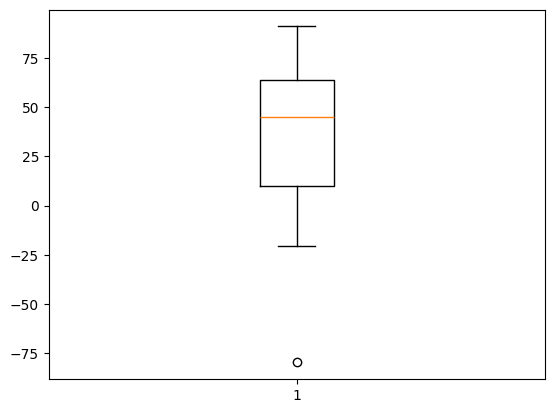

In [184]:
plt.boxplot(df["Discount Percentage"])

In [185]:
df["Discount Price"].skew()

np.float64(1.963474740645439)

In [186]:
df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g,6910.000000
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g,13200.000001
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g,5991.000000
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +,18200.000000
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g,3400.000000


In [187]:


df.drop(columns="Discount Percentage", inplace=True)



In [188]:
df.head()

,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,noise,82990.0,89900.0,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g,6910.000000
1,fire-boltt,3799.0,16999.0,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g,13200.000001
2,boat,1999.0,7990.0,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g,5991.000000
3,fire-boltt,1799.0,19999.0,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +,18200.000000
4,noise,1599.0,4999.0,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g,3400.000000


In [189]:
numerical = [feature for feature in df.columns if df[feature].dtype != "object"]
numerical

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Discount Price']

In [190]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 449
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Current Price        440 non-null    float64
 1   Original Price       440 non-null    float64
 2   Rating               440 non-null    float64
 3   Number OF Ratings    440 non-null    float64
 4   Battery Life (Days)  440 non-null    float64
 5   Discount Price       440 non-null    float64
dtypes: float64(6)
memory usage: 24.1 KB


In [191]:
df[numerical].describe()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Discount Price
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12794.250000,13648.854545,4.033864,9981.279545,14.237377,4936.252273
std,17734.708001,14483.626960,0.552290,38206.552996,7.453448,3540.956731
min,1199.000000,1669.000000,1.000000,1.000000,0.750000,-2500.000000
25%,2299.000000,5999.000000,3.900000,99.750000,8.000000,3000.000000
50%,3999.000000,7999.000000,4.100000,830.000000,14.237377,4001.000000
75%,17121.750000,14991.250000,4.300000,4723.750000,22.000000,5991.000000
max,139990.000000,96390.000000,5.000000,619130.000000,22.000000,19588.999998


In [192]:
df[numerical].skew()

Current Price           2.730871
Original Price          2.956394
Rating                 -1.583023
Number OF Ratings      10.870748
Battery Life (Days)    -0.240562
Discount Price          1.963475
dtype: float64

In [193]:
df["Number OF Ratings"].value_counts()

Number OF Ratings
830.0     60
6.0       10
3.0       10
5.0        8
2847.0     7
          ..
1328.0     1
469.0      1
17.0       1
33.0       1
83.0       1
Name: count, Length: 250, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a7b6934260>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7b6934890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7b6933ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7b6934e60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a7b6935190>],
 'means': []}

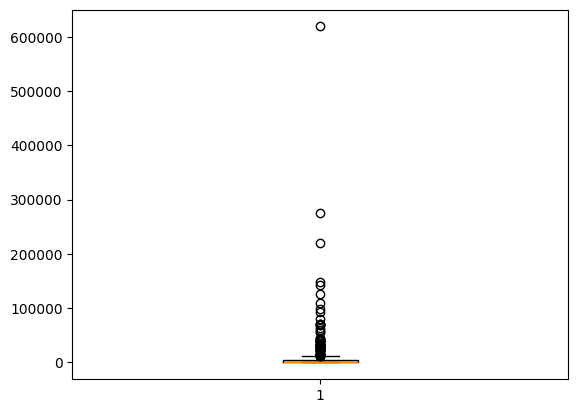

In [194]:
plt.boxplot(df["Number OF Ratings"])

In [195]:
df.head()

,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,noise,82990.0,89900.0,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g,6910.000000
1,fire-boltt,3799.0,16999.0,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g,13200.000001
2,boat,1999.0,7990.0,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g,5991.000000
3,fire-boltt,1799.0,19999.0,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +,18200.000000
4,noise,1599.0,4999.0,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g,3400.000000


In [196]:
df["Display Size"].head()

0           NaN
1    1.8 inches
2    1.7 inches
3    1.8 inches
4    1.7 inches
Name: Display Size, dtype: object

In [197]:
df["Display Size"].isnull().sum()

np.int64(30)

In [198]:
df["Display Size"] = df["Display Size"].fillna("0.0 inches")
df["Display Size"].isnull().sum()

np.int64(0)

In [199]:
"1.7 inches".split()[0]

'1.7'

In [200]:
df["Display Size"] = df["Display Size"].apply( lambda x: float(x.split()[0]) )
df["Display Size"].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [201]:
df["Display Size"] = df["Display Size"].apply( lambda x: np.nan if x == 0.0 else x)

In [202]:
df["Display Size"].isnull().sum()

np.int64(31)

In [203]:
df["Display Size"].skew()

np.float64(6.78718426845856)

In [204]:
df["Display Size"] = df["Display Size"].fillna(df["Display Size"].median())
df["Display Size"].isnull().sum()

np.int64(0)

In [205]:
numerical = [feature for feature in df.columns if df[feature].dtype != "object"]
numerical

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Discount Price']

In [206]:
df.head()

,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,noise,82990.0,89900.0,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,1.6,35 - 50 g,6910.000000
1,fire-boltt,3799.0,16999.0,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,50 - 75 g,13200.000001
2,boat,1999.0,7990.0,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,35 - 50 g,5991.000000
3,fire-boltt,1799.0,19999.0,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75g +,18200.000000
4,noise,1599.0,4999.0,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,35 - 50 g,3400.000000


In [207]:
df["Weight"].head()

0    35 - 50 g
1    50 - 75 g
2    35 - 50 g
3        75g +
4    35 - 50 g
Name: Weight, dtype: object

In [208]:
df["Weight"].value_counts()

Weight
20 - 35 g    78
75g +        65
35 - 50 g    55
<= 20 g      43
50 - 75 g    13
Name: count, dtype: int64

In [213]:
calc = (20 + 35) / 2
calc
df["Weight"].replace("20 - 35 g", calc, inplace=True)

In [221]:
df["Weight"].value_counts()

Weight
27.5    78
76.0    65
42.5    55
20.0    43
62.5    13
Name: count, dtype: int64

In [215]:
calc1 = (35 + 50) / 2
calc1
df["Weight"].replace("35 - 50 g", calc1, inplace=True)

In [217]:
df["Weight"].replace("75g +", 76, inplace=True)

In [218]:
calc2 = (50 + 75) / 2
calc2
df["Weight"].replace("50 - 75 g", calc2, inplace=True)

In [220]:
df["Weight"].replace("<= 20 g", 20, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17536\298182756.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Weight"].replace("<= 20 g", 20, inplace=True)


In [223]:
df["Weight"]

0      42.5
1      62.5
2      42.5
3      76.0
4      42.5
       ... 
445     NaN
446     NaN
447     NaN
448     NaN
449     NaN
Name: Weight, Length: 440, dtype: float64

In [224]:
numerical = [feature for feature in df.columns if df[feature].dtype != "object"]
numerical

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [226]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 449
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Current Price        440 non-null    float64
 1   Original Price       440 non-null    float64
 2   Rating               440 non-null    float64
 3   Number OF Ratings    440 non-null    float64
 4   Battery Life (Days)  440 non-null    float64
 5   Display Size         440 non-null    float64
 6   Weight               254 non-null    float64
 7   Discount Price       440 non-null    float64
dtypes: float64(8)
memory usage: 30.9 KB


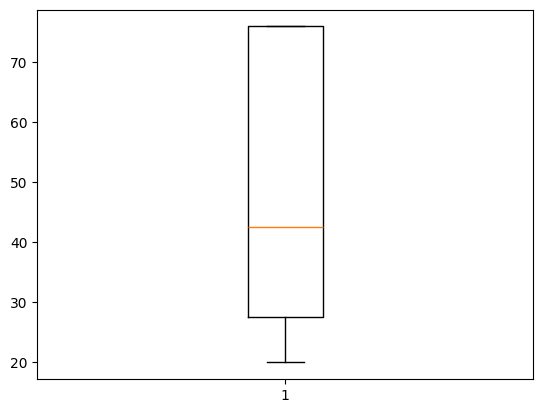

In [232]:
plt.boxplot(df["Weight"].dropna())  # drop NaNs for clean plot
plt.show()


In [233]:
df["Weight"].value_counts()

Weight
27.5    78
76.0    65
42.5    55
20.0    43
62.5    13
Name: count, dtype: int64

In [234]:
df["Weight"].isnull().sum()

np.int64(186)

In [235]:
df["Weight"] = df["Weight"].fillna(df["Weight"].mean())
df["Weight"].isnull().sum()

np.int64(0)

In [236]:
df["Weight"].head()

0    42.5
1    62.5
2    42.5
3    76.0
4    42.5
Name: Weight, dtype: float64

In [238]:
def remove_outlier_IQR(df, column):
    """
    Removes outliers from a specified column in the dataframe using the IQR method.
    
    Parameters:
        df (pd.DataFrame): The input dataframe
        column (str): The column name to clean
    
    Returns:
        pd.DataFrame: A new dataframe with outliers removed
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df


In [239]:
numerical

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [240]:
df_cleaned = remove_outlier_IQR(df,"Current Price") 
df_cleaned = remove_outlier_IQR(df,"Original Price")
df_cleaned = remove_outlier_IQR(df,"Rating")
df_cleaned = remove_outlier_IQR(df,"Number OF Ratings")
df_cleaned = remove_outlier_IQR(df,"Battery Life (Days)")
df_cleaned = remove_outlier_IQR(df,"Display Size")
df_cleaned = remove_outlier_IQR(df,"Weight")
df_cleaned = remove_outlier_IQR(df,"Discount Price")


In [241]:
df_cleaned.head()

,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,noise,82990.0,89900.0,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.000000,Yes,1.6,42.5,6910.0
2,boat,1999.0,7990.0,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.000000,Yes,1.7,42.5,5991.0
4,noise,1599.0,4999.0,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.000000,Yes,1.7,42.5,3400.0
5,noise,1499.0,3999.0,4.0,32704.0,NSW-05,NaN,NaN,Other,Yes,8.000000,Yes,1.7,42.5,2500.0
6,noise,1999.0,4999.0,4.1,1018.0,NaN,NaN,NaN,NaN,NaN,14.237377,Yes,1.4,42.5,3000.0


In [242]:

df_cleaned[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 0 to 449
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Current Price        405 non-null    float64
 1   Original Price       405 non-null    float64
 2   Rating               405 non-null    float64
 3   Number OF Ratings    405 non-null    float64
 4   Battery Life (Days)  405 non-null    float64
 5   Display Size         405 non-null    float64
 6   Weight               405 non-null    float64
 7   Discount Price       405 non-null    float64
dtypes: float64(8)
memory usage: 28.5 KB


In [243]:
df_cleaned[numerical].describe()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
count,405.00000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,12090.34321,11845.782716,4.017037,10488.955556,14.659652,2.195556,43.238515,4189.822222
std,17456.44239,12242.545752,0.562157,39718.959882,7.342598,4.455937,15.791844,1994.097020
min,1199.00000,1669.000000,1.000000,1.000000,0.750000,0.100000,20.000000,-1330.000000
25%,2199.00000,5999.000000,3.800000,102.000000,8.000000,1.300000,27.500000,3000.000000
50%,3999.00000,7999.000000,4.100000,830.000000,17.500000,1.600000,43.681102,4001.000000
75%,16495.00000,9999.000000,4.300000,4694.000000,22.000000,1.800000,43.681102,5291.000000
max,139990.00000,93990.000000,5.000000,619130.000000,22.000000,45.000000,76.000000,10200.000000


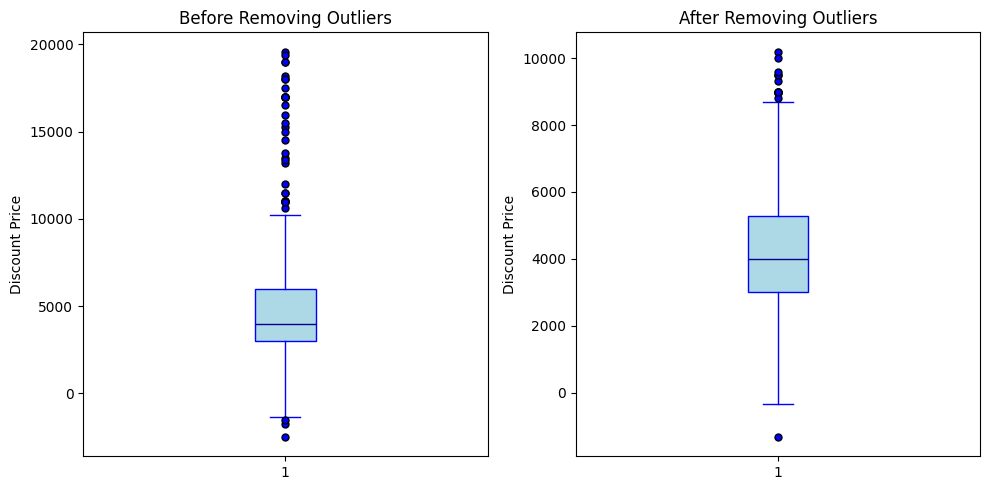

In [246]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Boxplot before removing outliers
plt.subplot(1, 2, 1)
plt.boxplot(df['Discount Price'].dropna(), patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='darkblue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='blue', marker='o', markersize=5))
plt.title('Before Removing Outliers')
plt.ylabel('Discount Price')

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['Discount Price'].dropna(), patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='darkblue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='blue', marker='o', markersize=5))
plt.title('After Removing Outliers')
plt.ylabel('Discount Price')

plt.tight_layout()
plt.show()


In [248]:


df_cleaned[numerical].corr()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
Current Price,1.000000,0.606116,0.381907,-0.121835,0.011153,-0.000576,-0.197512,-0.045103
Original Price,0.606116,1.000000,0.217907,-0.097547,-0.113293,0.023507,-0.133562,0.132954
Rating,0.381907,0.217907,1.000000,0.061105,-0.071394,0.062521,-0.209717,-0.054428
Number OF Ratings,-0.121835,-0.097547,0.061105,1.000000,0.036082,-0.034527,0.031016,-0.013652
Battery Life (Days),0.011153,-0.113293,-0.071394,0.036082,1.000000,0.019487,-0.101403,-0.148209
Display Size,-0.000576,0.023507,0.062521,-0.034527,0.019487,1.000000,0.018378,-0.037189
Weight,-0.197512,-0.133562,-0.209717,0.031016,-0.101403,0.018378,1.000000,0.054222
Discount Price,-0.045103,0.132954,-0.054428,-0.013652,-0.148209,-0.037189,0.054222,1.000000


In [249]:
df_cleaned[numerical].skew()

Current Price           2.880651
Original Price          3.434366
Rating                 -1.515544
Number OF Ratings      10.479554
Battery Life (Days)    -0.313537
Display Size            6.765819
Weight                  0.765048
Discount Price          0.564948
dtype: float64